In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
train_data = pd.read_csv('/Users/lirving/loan-prediction/datasets/loan_train.csv')
test_data = pd.read_csv('/Users/lirving/loan-prediction/datasets/loan_test.csv')

In [89]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [91]:
#Change categorical data from 'object' type to 'category' type

Gender = train_data['Gender'].astype('category')
Married = train_data['Married'].astype('category')
Dependents = train_data['Dependents'].astype('category')
Education = train_data['Education'].astype('category')
Self_Employed = train_data['Self_Employed'].astype('category')

In [92]:
#Fill NA values

train_data['Gender'].fillna(method='ffill', inplace=True)
train_data['Married'].fillna(method='ffill', inplace=True)
train_data['Dependents'].fillna('0', inplace=True)
train_data['Self_Employed'].fillna(method='ffill', inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(method='ffill', inplace=True)

In [93]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.835505
std,6109.041673,2926.248369,84.107233,64.428629,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## Visualizations

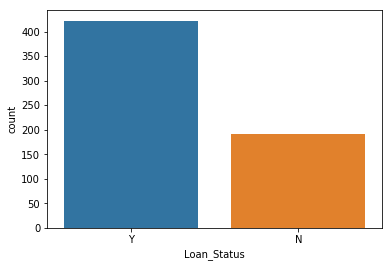

In [94]:
sns.countplot(train_data['Loan_Status']);

As can be seen in the diagram above, most loans are accepted.

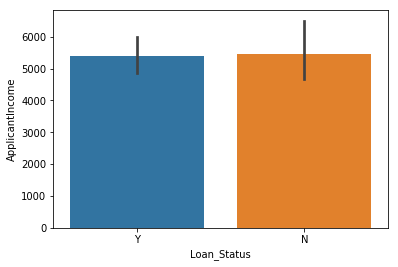

In [95]:
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=train_data);

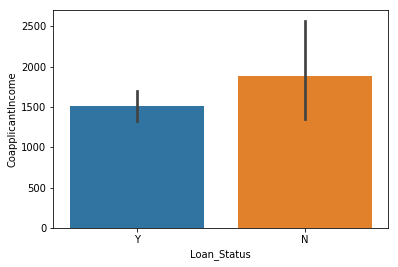

In [96]:
sns.barplot(x='Loan_Status', y='CoapplicantIncome', data=train_data);

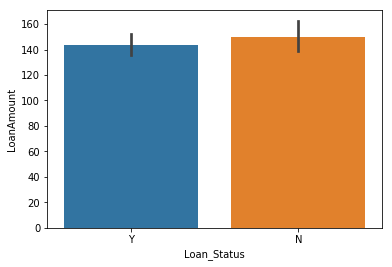

In [97]:
sns.barplot(x='Loan_Status', y='LoanAmount', data=train_data);

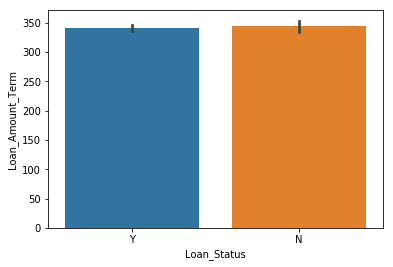

In [98]:
sns.barplot(x='Loan_Status', y='Loan_Amount_Term', data=train_data);

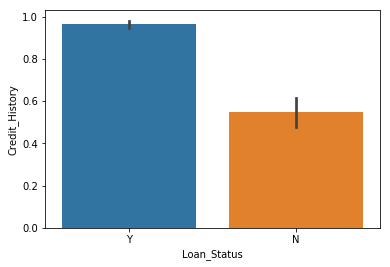

In [99]:
sns.barplot(x='Loan_Status', y='Credit_History', data=train_data);

Of the numeric variables, *CoapplicantIncome* and *Credit_History* seem to be the only ones correlated with *Loan_Status*.